In [57]:
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score

from sklearn.base import ClassifierMixin

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

### Make the plots look nicer

In [58]:
# Some code to make the plots look nicer
plt.rcParams['figure.dpi'] = 150
sns.set_theme(font='Georgia', style="whitegrid", palette="pastel")
sns.set_context(
    "notebook", 
    rc={
        "font.size":      16,
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "axes.labelpad":  15,
        "axes.titlepad":  15,
        # grid
        "grid.linewidth": 0.5,
        "grid.linestyle": ":",
    })

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Amber, CB91_Pink, CB91_Green, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [59]:
df_individual_reverse = pd.read_csv('df_individual_reverse.csv')
df_individual_reverse = df_individual_reverse.drop('Unnamed: 0', axis = 1)
X_individual_reverse = df_individual_reverse.drop(['Winner', 'match', 'Year'], axis = 1)
y_individual_reverse = df_individual_reverse['Winner']

In [60]:
df_individual_reverse.head()

,match,GK Home,GK Away,FW Home,FW Away,MF Home,MF Away,DF Home,DF Away,backup Home,backup Away,Year,Winner
0,South Africa-Mexico,72.000,71.0,65.000,74.175,69.673,68.382,69.282,74.333,63.410,65.504,2010,1
1,Mexico-South Africa,71.000,72.0,74.175,65.000,68.382,69.673,74.333,69.282,65.504,63.410,2010,1
2,Uruguay-France,81.000,88.0,77.667,73.561,77.264,77.671,76.000,78.333,65.269,66.197,2010,1
3,France-Uruguay,88.000,81.0,73.561,77.667,77.671,77.264,78.333,76.000,66.197,65.269,2010,1
4,South Korea-Greece,65.556,74.0,70.852,73.667,65.556,70.750,66.037,75.667,64.111,63.917,2010,2


In [61]:
# We seperate the test data. We will not touch it. It will be used to compare different models.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 109)

In [62]:
# We seperate the test data. We will not touch it. It will be used to compare different models.
X_train, X_test, y_train, y_test = train_test_split(X_individual_reverse, y_individual_reverse, test_size=0.2, random_state = 109)

In [63]:
model_dic = {}
#dictiionary for models. In the form {model1: {mse_acc : ..., test_acc: ..., model_func: ...}, model2: ..., ...}

In [64]:
X_train.head()

,GK Home,GK Away,FW Home,FW Away,MF Home,MF Away,DF Home,DF Away,backup Home,backup Away
295,91.0,85.0,83.333,79.515,86.500,82.000,88.333,81.667,72.917,70.083
221,89.0,65.3,78.667,70.100,86.548,66.475,86.333,67.433,74.266,63.175
307,69.0,89.0,79.000,83.667,75.000,86.250,77.000,86.333,65.250,81.917
226,79.0,81.0,75.667,82.333,72.000,77.036,75.000,80.000,63.635,63.345
303,70.9,82.0,76.667,84.333,75.500,85.500,73.667,81.333,67.233,75.833


In [65]:
y_train.head()

295    1
221    2
307    2
226    2
303    0
Name: Winner, dtype: int64


## <div class='exercise'>FIRST MODEL: Straighforward Logistic Regression with Three Independent Classes</div> 

In [66]:
LR = LogisticRegression(max_iter = 10000, fit_intercept = False)
LR.fit(X_train, y_train)
LR_predict_proba = LR.predict_proba(X_train)
LR_predict_proba = pd.DataFrame(LR_predict_proba, columns = ['0', '1', '2'])
LR_pred = pd.Series(LR.predict(X_train), name = 'Winner')

In [67]:
accuracy_score(LR_pred,y_train)

0.5662650602409639

In [68]:
CV1 = cross_validate(LR, X_train, y_train, cv=5, scoring = 'accuracy', return_train_score = True)
print(CV1)
print(CV1['train_score'].mean())
print(CV1['test_score'].mean())

{'fit_time': array([0.03039408, 0.02194595, 0.04084206, 0.03900528, 0.02835584]), 'score_time': array([0.00233388, 0.00229812, 0.00265503, 0.00182867, 0.00187111]), 'test_score': array([0.58208955, 0.47761194, 0.5       , 0.5       , 0.60606061]), 'train_score': array([0.55471698, 0.60377358, 0.57894737, 0.56766917, 0.56390977])}
0.573803376365442
0.5331524197195839


In [69]:
accuracy_score(LR.predict(X_test),y_test)

0.5476190476190477

In [70]:
MODELS = pd.DataFrame([['Logistic Regression', accuracy_score(LR_pred,y_train), accuracy_score(LR.predict(X_test),y_test)]], columns = ['Model', 'Train Score', 'Test Score'])
display(MODELS)

,Model,Train Score,Test Score
0,Logistic Regression,0.566,0.548


In [71]:
MODEL_NAME = ['Logistic Regression']
TRAIN_SCORE = [accuracy_score(LR_pred,y_train)]
TEST_SCORE = [accuracy_score(LR.predict(X_test),y_test)]

## <div class='exercise'>SECOND MODEL: Threshold Model (we create it from scratch)</div> 

In [72]:
def new_dummies(y):
    '''
    given a response variable that takes values 0,1,2
    returns two dummies y_01 and y_12
    y_01: 0 if y == 0; 1 if y== 1 or 2
    y_12: 0 if y==0 or 1; 1 if y==2
    '''
    y_01 = y.copy()
    y_01 = y_01.replace(2, 1)
    
    y_12 = y.copy()
    y_12 = y_12.replace(1,0)
    y_12 = y_12.replace(2,1)
    return y_01, y_12

In [73]:
class ThresholdModel(ClassifierMixin):
    def __init__(self, threshold):
        self.threshold = threshold
        self.func = None
        self.func_proba = None
        
    def fit(self, X, y):
        threshold = self.threshold
        y_01, y_12 = new_dummies(y)
        LR_01 = LogisticRegression(max_iter = 16000)
        LR_01.fit(X, y_01)
        LR_12 = LogisticRegression(max_iter = 16000)
        LR_12.fit(X, y_12)
            
        def func_proba(X_new):
            pred_01 = pd.DataFrame(LR_01.predict_proba(X_new), columns = ['0', '12'])
            pred_12 = pd.DataFrame(LR_12.predict_proba(X_new), columns = ['01', '2'])
            probs = pred_01.copy().drop('12', axis=1)
            probs['1'] = pred_12['01'] - pred_01['0']
            probs['2'] = pred_12['2']
            
            return probs
            
        self.func_proba = func_proba
        
        def threshold_func(X_new):
            pred = self.func_proba(X_new)
            threshold = self.threshold
            pred.loc[pred['0'] - pred['2'] > threshold, 'Win'] = 0
            pred.loc[pred['2'] - pred['0']> threshold, 'Win'] = 2
            pred = pred.fillna(1)

            return pred['Win']
            
        self.func = threshold_func
        
            
    def predict(self, X):
        return self.func(X)
    
    def predict_proba(self, X):
        return self.func_proba(X)
    
    def get_params(self, deep = False):
        return {'threshold': self.threshold}
    
    def set_params(self, value):
        setattr(self, threshold, value)
        return self
    
        
            

In [74]:
model2_options = []
model2_train_accuracies = []
model2_val_accuracies = []
thresholds = []
for i in range(0,100):
    thresholds.append(i/1000)
for threshold in thresholds:
    predictor=ThresholdModel(threshold)
    CV2 = cross_validate(predictor, X_train, y_train, cv=5, return_train_score=True, scoring = 'accuracy')
    model2_options.append(predictor)
    model2_train_accuracies.append(CV2['train_score'].mean())
    model2_val_accuracies.append(CV2['test_score'].mean())
     

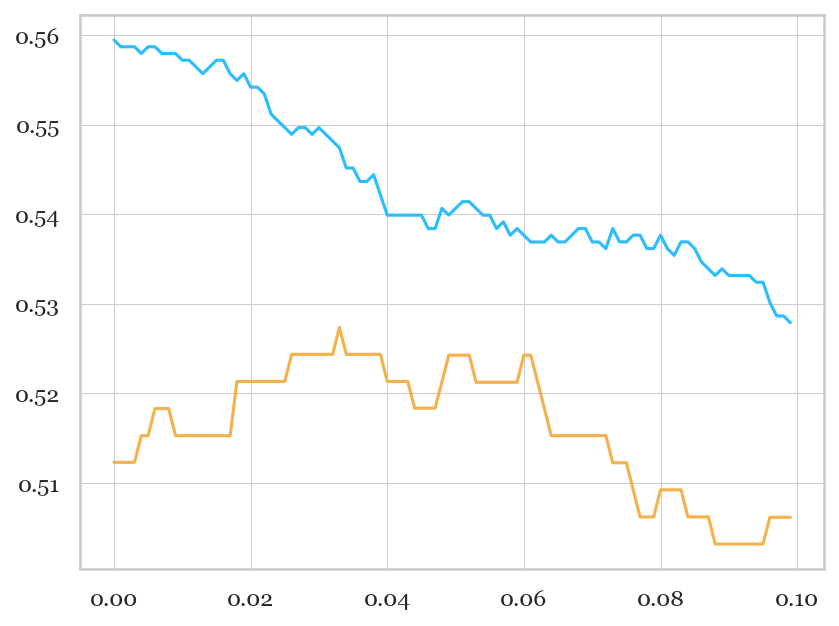

In [75]:
plt.plot(thresholds, model2_train_accuracies)
plt.plot(thresholds, model2_val_accuracies)

In [76]:
print(np.max(model2_train_accuracies))
print(np.max(model2_val_accuracies))

0.5594949638246559
0.5273631840796019


In [77]:
print(np.argmax(model2_train_accuracies))
print(np.argmax(model2_val_accuracies))

0
33


In [78]:
best_threshold = (np.argmax(model2_val_accuracies) + 1)/1000
best_model2 = ThresholdModel(best_threshold)
best_model2.fit(X_train, y_train)
print(accuracy_score(best_model2.predict(X_train), y_train))
print(accuracy_score(best_model2.predict(X_test), y_test))

0.5632530120481928
0.5


In [79]:
MODEL_NAME.append('Threshold = ' + str(best_threshold))
TRAIN_SCORE.append(accuracy_score(best_model2.predict(X_train), y_train))
TEST_SCORE.append(accuracy_score(best_model2.predict(X_test), y_test))

## <div class='exercise'>THIRD MODEL: Decision Tree</div> 

Text(0.5, 1.0, 'Depth vs. Accuracy in Train Data - Zoomed in')

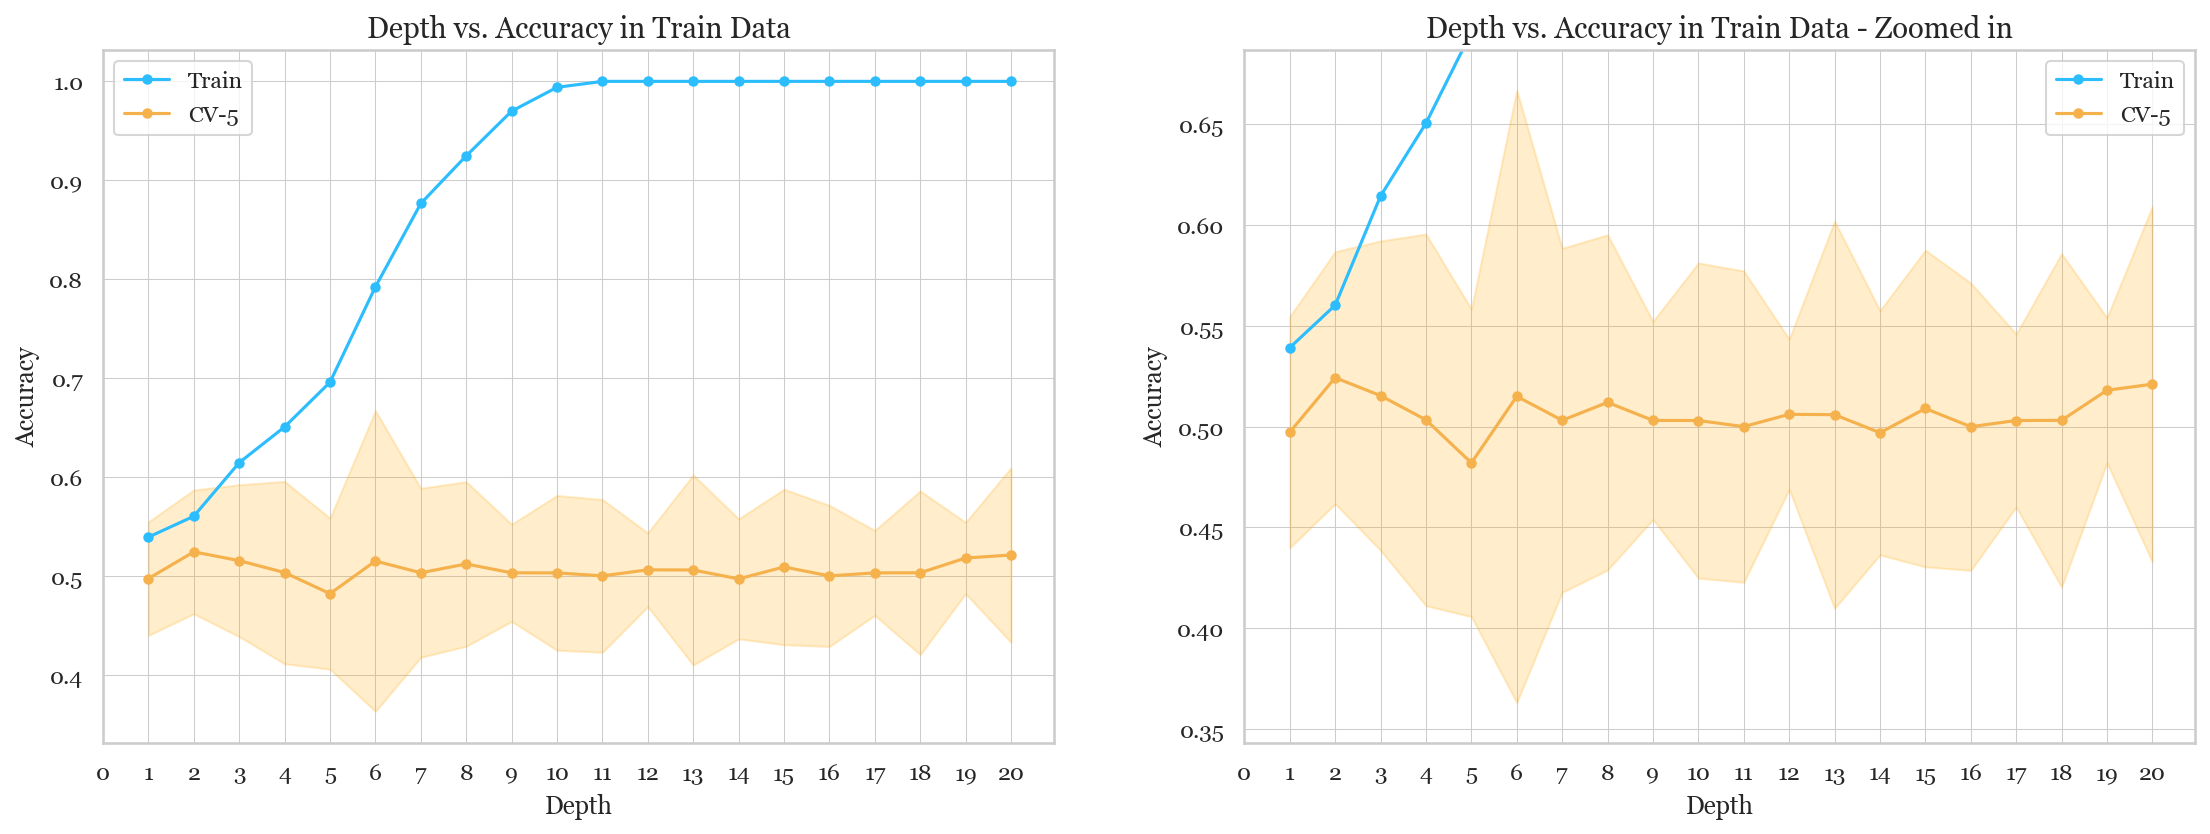

In [80]:
cvmeans = []
cvstds = []
train_scores = []
for d in range(1,21):
    dtree = DecisionTreeClassifier(max_depth = d, criterion = 'gini')
    dtree.fit(X_train, y_train)
    train_scores.append(dtree.score(X_train, y_train))
    cvscores = cross_val_score(dtree, X_train, y_train, cv=5)
    cvmeans.append(cvscores.mean())
    cvstds.append(cvscores.std())

cvmeans = pd.Series(cvmeans)
cvstds = pd.Series(cvstds)   

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,6))
axes = axes.ravel()

for ax in axes:
    ax.plot(range(1, 21), train_scores, label = "Train", marker = 'o', markersize = 4)
    ax.plot(range(1, 21), cvmeans, label = "CV-5", marker = 'o', markersize = 4)
    ax.fill_between(x = np.arange(1,21,step=1), y1 = cvmeans - 2*cvstds, y2 = cvmeans + 2*cvstds, alpha = 0.2, color = 'orange')
    ax.legend()
    ax.set_xticks(ticks = np.arange(0, 21, step=1))
    ax.set_xlabel('Depth')
    ax.set_ylabel('Accuracy')

#set the limits for the second graph
axes[1].set_ylim(ymin = np.min(cvmeans - 2*cvstds) - 0.02, ymax = np.max(cvmeans + 2*cvstds) + 0.02)

#title for the graphs
axes[0].set_title('Depth vs. Accuracy in Train Data')
axes[1].set_title('Depth vs. Accuracy in Train Data - Zoomed in')

In [81]:
# your code here
# choose best depth after a qualitative assessment of our plots
best_cv_depth = np.argmax(cvmeans)+1

dtree = DecisionTreeClassifier(max_depth = best_cv_depth, criterion = 'gini')
dtree.fit(X_train, y_train)
    
best_cv_tree_train_score = accuracy_score(dtree.predict(X_train), y_train)
best_cv_tree_test_score = accuracy_score(dtree.predict(X_test), y_test)

In [82]:
# print model results summary
print(
    "The tree of max-depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_tree_train_score,
        best_cv_tree_test_score,
    )
)

The tree of max-depth 2 trained on the full training set, achieves the following accuracy scores:

	train	0.5602
	TEST	0.4286


In [83]:
MODEL_NAME.append('Decision Tree, depth = ' + str(best_cv_depth))
TRAIN_SCORE.append(best_cv_tree_train_score)
TEST_SCORE.append(best_cv_tree_test_score)

## <div class='exercise'>FOURTH MODEL: Bagging for Decision Tree</div> 

In [84]:
# COPT-PASTED FROM HW6

def bagger(
    n_trees: int,
    tree_depth: int,
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_test: np.ndarray,
    random_seed: int = 0,
) -> (pd.DataFrame, pd.DataFrame, list):
    """Generate boostrapped DecisionTreeClassifier predictions
    
    Function fits bootstrapped DecisionTreeClassifier models
    and returns training and test predictions for each of those
    bootstrapped models, along with the fitted model objects as
    described in Question 2.2 question text.
    
    :param n_trees: int, number of bootstrapped decision trees
    :param tree_depth: int, maximum tree depth
    :param X_train: np.ndarray, training X observations
    :param y_train: np.ndarray, training y observations
    :param X_test: np.ndarray, test X observations
    :param random_seed: int, random seed used to set np.random.seed
                        to ensure replicable results (default=0)
    
    :returns: (pd.DataFrame, pd.DataFrame, list), tuple containing 3
              objects, (1) bagging_train_df dataframe
              as described in Q2.2 question text, (2) bagging_test_df
              dataframe as described in Q2.2, and (3) bagging_models_list
              containing every trained DecisionTreeClassifier model
              object (i.e. estimator), one estimator for each bootstrap
              (you will need this list later in Q3.2)
    """
    
    # set random seed for replicable results
    np.random.seed(random_seed)
    
    # instantiate arrays and list for storing results
    bagging_train = np.zeros((X_train.shape[0], n_trees)).astype(int)
    bagging_test = np.zeros((X_test.shape[0], n_trees)).astype(int)

    bagging_models_list = []

    # perform n bootstraps
    for i in range(n_trees):
        # generate bootstrapped model
        bootstrapped_X, bootstrapped_y = resample(X_train, y_train)
        fitted_model = DecisionTreeClassifier(
            max_depth=tree_depth
        ).fit(bootstrapped_X, bootstrapped_y)
        bagging_models_list.append(fitted_model)

        # predict on full training and test sets and store
        # results to arrays
        bagging_train[:,i] = fitted_model.predict(X_train)
        bagging_test[:,i] = fitted_model.predict(X_test)
    
    # convert arrays to pandas dataframes as required
    bagging_train_df = pd.DataFrame(
        bagging_train[:, :],
        columns=[f"model{x}" for x in range(n_trees)],
    )
    bagging_test_df = pd.DataFrame(
        bagging_test[:, :],
        columns=[f"model{x}" for x in range(n_trees)],
    )
    
    return bagging_train_df, bagging_test_df, bagging_models_list
    

In [85]:
n_trees = 250
tree_depth = best_cv_depth

In [86]:
bagging_train_df, bagging_test_df , bagging_models_list = bagger(n_trees, tree_depth, X_train, y_train, X_test)

In [87]:
# display resulting dataframe heads
display(bagging_train_df.head())
display(bagging_test_df.head())

,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20,model21,model22,model23,model24,...,model225,model226,model227,model228,model229,model230,model231,model232,model233,model234,model235,model236,model237,model238,model239,model240,model241,model242,model243,model244,model245,model246,model247,model248,model249
0,2,2,2,2,2,0,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,0,2,2,...,0,2,2,2,0,2,2,2,2,2,0,2,2,2,2,0,0,2,0,2,2,2,0,2,2
1,2,2,2,2,2,2,2,2,2,2,2,1,0,2,0,2,2,2,2,2,2,2,2,2,1,...,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,2,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,2,0,0,2,0,2,0
4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20,model21,model22,model23,model24,...,model225,model226,model227,model228,model229,model230,model231,model232,model233,model234,model235,model236,model237,model238,model239,model240,model241,model242,model243,model244,model245,model246,model247,model248,model249
0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,2,0,0,2,0,0,0
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,2,0,0,0,0,0,0


In [88]:
#classifications
train_classes = pd.DataFrame(np.ones(len(bagging_train_df)).T, columns = ['classification'])
train_classes.loc[bagging_train_df.mean(axis=1)>1.05, 'classification'] = 2
train_classes.loc[bagging_train_df.mean(axis=1)<0.95, 'classification'] = 0

test_classes = pd.DataFrame(np.ones(len(bagging_test_df)).T, columns = ['classification'])
test_classes.loc[bagging_test_df.mean(axis=1)>1.05, 'classification'] = 2
test_classes.loc[bagging_test_df.mean(axis=1)<0.95, 'classification'] = 0

#evaluate accuracy on our bagged prediction results
bagging_accuracy_train = accuracy_score(train_classes['classification'], y_train)
bagging_accuracy_test = accuracy_score(test_classes['classification'], y_test)

In [89]:
# print summary of results
print(
    f"Bagging {n_trees} trees of depth-{tree_depth} achieves "
    f"the following accuracy scores:\n\n\ttrain\t"
    f"{bagging_accuracy_train:.4f}\n\tTEST\t"
    f"{bagging_accuracy_test:.4f}\n"
)
print(
    f"Our prior single depth-{best_cv_depth} tree achieved a "
    f"TEST score of {best_cv_tree_test_score:.4f}."
)

Bagging 250 trees of depth-2 achieves the following accuracy scores:

	train	0.6235
	TEST	0.5357

Our prior single depth-2 tree achieved a TEST score of 0.4286.


In [90]:
MODEL_NAME.append('Bagging Decision Tree, depth = ' + str(best_cv_depth))
TRAIN_SCORE.append(bagging_accuracy_train)
TEST_SCORE.append(bagging_accuracy_test)

NOW, let us try to change the "epsilon" for the threshold. It was +- 0.05 above

In [91]:


model3_options = []
model3_train_accuracies = []
model3_test_accuracies = []
epsilons = []
for i in range(0,1000):
    epsilons.append(i/1000)
for eps in epsilons:
    train_classes = pd.DataFrame(np.ones(len(bagging_train_df)).T, columns = ['classification'])
    train_classes.loc[bagging_train_df.mean(axis=1)>1 + eps, 'classification'] = 2
    train_classes.loc[bagging_train_df.mean(axis=1)<1 - eps, 'classification'] = 0

    test_classes = pd.DataFrame(np.ones(len(bagging_test_df)).T, columns = ['classification'])
    test_classes.loc[bagging_test_df.mean(axis=1)>1 + eps, 'classification'] = 2
    test_classes.loc[bagging_test_df.mean(axis=1)<1 - eps, 'classification'] = 0

    #evaluate accuracy on our bagged prediction results
    bagging_accuracy_train = accuracy_score(train_classes['classification'], y_train)
    bagging_accuracy_test = accuracy_score(test_classes['classification'], y_test)
    
    model3_train_accuracies.append(bagging_accuracy_train)
    model3_test_accuracies.append(bagging_accuracy_test)

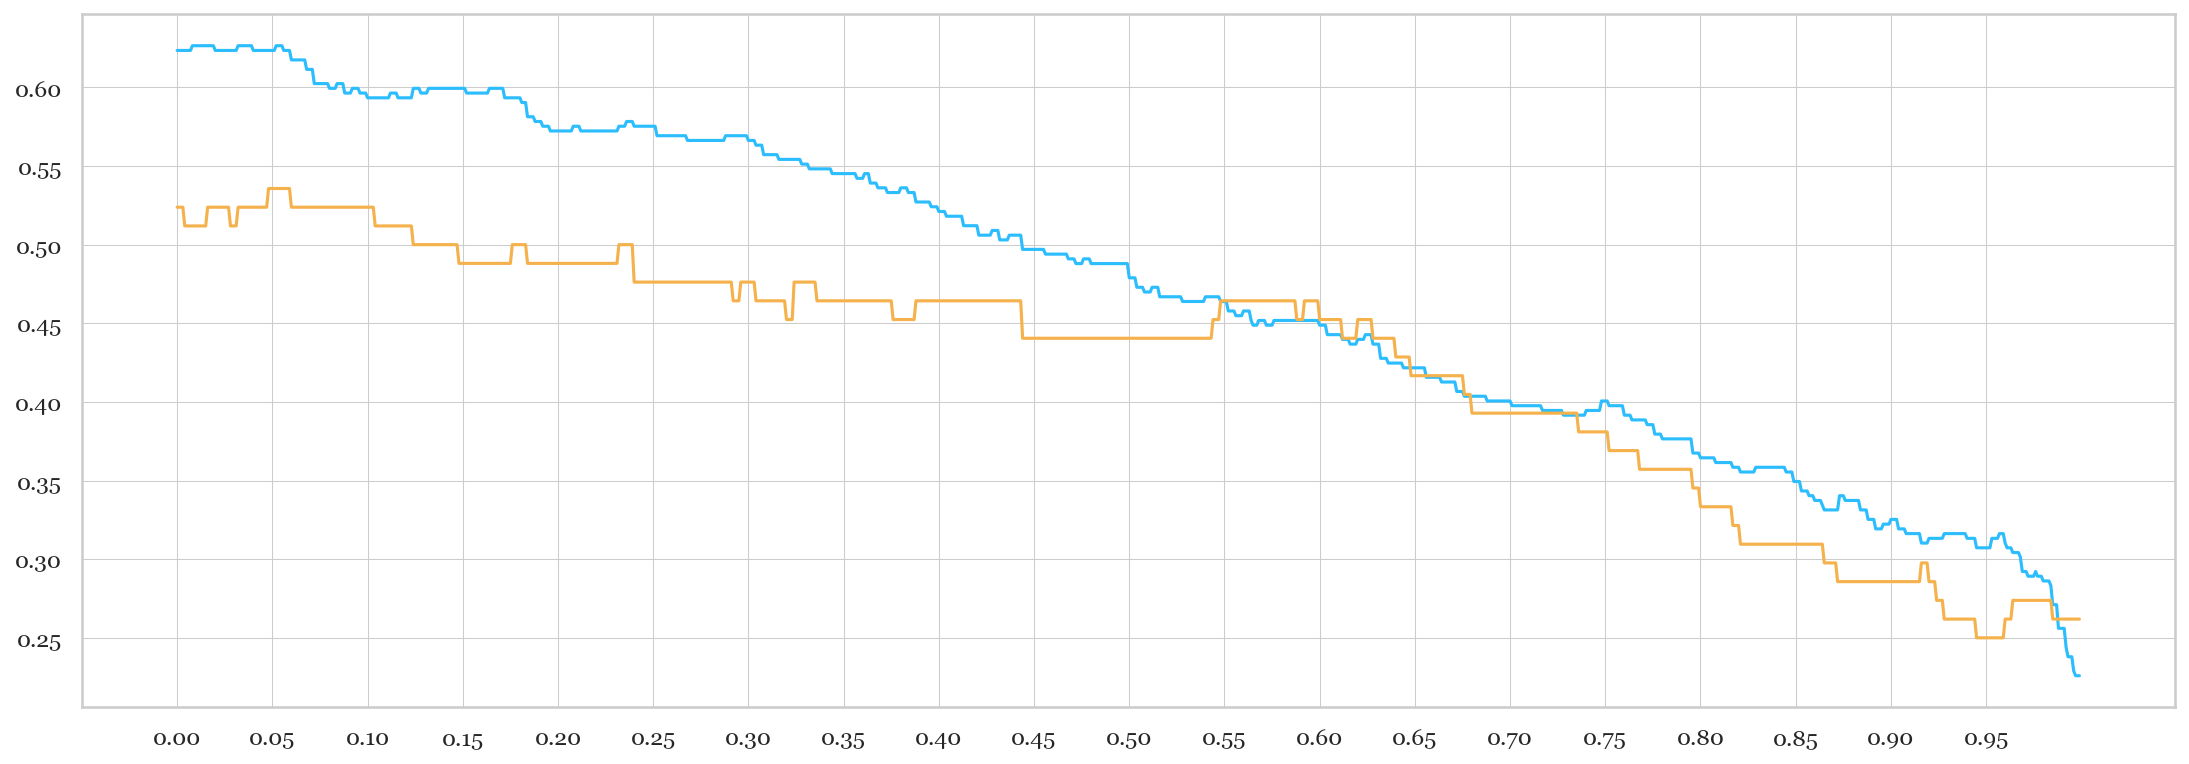

In [92]:
ticks = []
for i in range(0,20):
    ticks.append(i/20)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (18,6))
plt.plot(epsilons, model3_train_accuracies)
plt.plot(epsilons, model3_test_accuracies)
plt.xticks(ticks = ticks);

## <div class='exercise'>FIFTH MODEL: Random Forest</div> 

In [93]:
cvmeans = []
train_scores = []
for d in range(20):
    rf = RandomForestClassifier(max_depth = d+1,
                               max_features = 'sqrt',
                               oob_score = False,
                               random_state = 0,
                               n_estimators = n_trees)
   

    rf.fit(X_train, y_train)
    train_scores.append(dtree.score(X_train, y_train))
    cvscores = cross_val_score(dtree, X_train, y_train, cv=5)
    cvmeans.append(cvscores.mean())



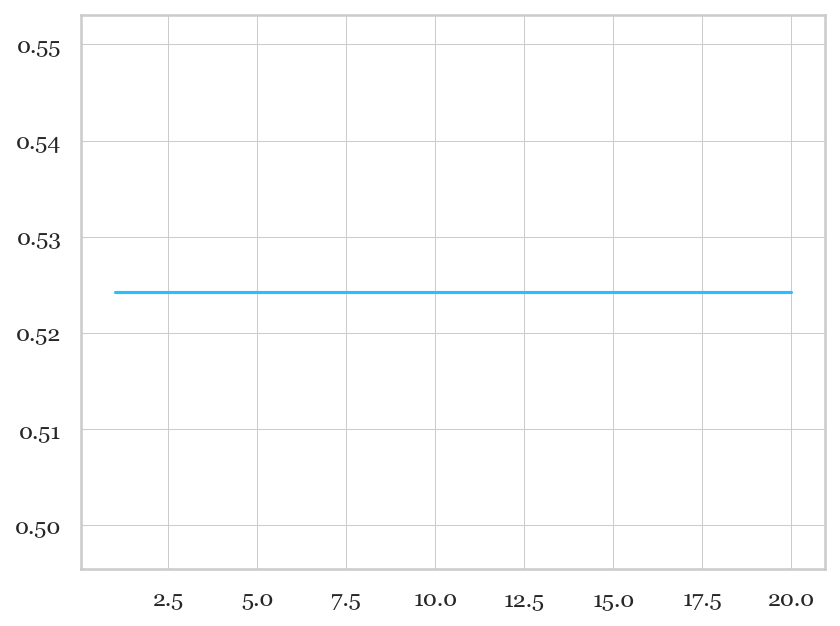

In [94]:
plt.plot(range(1,21), cvmeans)

In [95]:
best_depth = np.argmax(cvmeans)+1
rf = RandomForestClassifier(max_depth = best_depth,
                           max_features = 'sqrt',
                           oob_score = False,
                           random_state = 0,
                           n_estimators = n_trees)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=250, random_state=0)

In [96]:
# evaluate results
random_forest_train_score = rf.score(X_train, y_train)
random_forest_test_score = rf.score(X_test, y_test)

In [97]:
# print results summary
print(
    "The random forest of depth-{} and {} trees achieves the "
    "following accuracy scores:\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        tree_depth,
        n_trees,
        random_forest_train_score,
        random_forest_test_score,
    )
)

The random forest of depth-2 and 250 trees achieves the following accuracy scores:

	train	0.6084
	TEST	0.4762


In [98]:
MODEL_NAME.append('Random Forest, depth = ' + str(best_depth))
TRAIN_SCORE.append(random_forest_train_score)
TEST_SCORE.append(random_forest_test_score)

## <div class='exercise'>CONCLUSION: Choice of the Model</div> 

In [99]:
MODELS_df = pd.DataFrame()
MODELS_df['Model'] = MODEL_NAME
MODELS_df['Train Score'] = TRAIN_SCORE
MODELS_df['Test Score'] = TEST_SCORE
display(MODELS_df)

,Model,Train Score,Test Score
0,Logistic Regression,0.566,0.548
1,Threshold = 0.034,0.563,0.500
2,"Decision Tree, depth = 2",0.560,0.429
3,"Bagging Decision Tree, depth = 2",0.623,0.536
4,"Random Forest, depth = 1",0.608,0.476


We choose the random forest.

If you want to use it, just do rf.predict()


The models we tried:
1) Simple Logistic Regression = 0.529
2) Threshold Model we created = 0.529
3) Simple Decision Tree = 0.577
3) Decision Tree with Bagging = 0.577
4) Random Forest = 0.596

Note that this is not a binary classification problem. We have three classes.

If you want to use rf to make binary choices, you can look at rf.predict_proba(X) and choose the higher probability among 2 and 0.\
Note that 2 means home wins, 1 means draw, 0 means away wins.

Don't hesitate contacting me (Suat) in case of an issue with the modeling or questions related to this jupyter notebook.\
For questions regarding the dataset, please contact

# Simulating the 2022 World Cup

We use our random forest model to simulate the 2022 World Cup, by predicting the results of the matches and propagating the results to the next round, until we have a winner.

In [100]:
# getting the dataframes of the matches of the 2022 world cup
df_groups = pd.read_csv('data/group_stage_22.csv')

# standardize the country names
df_groups.replace(['Germany FR', 'German DR'], 'Germany', inplace=True)
df_groups.replace(['IR Iran'], 'Iran', inplace=True)
df_groups.replace(['USA'], 'United States', inplace=True)
df_groups.replace(['Korea Republic'], 'South Korea', inplace=True)

print('\ndf_groups has {} rows and {} columns'.format(df_groups.shape[0], df_groups.shape[1]))
display(df_groups.head())

# getting the dataframes of the matches of the 2022 world cup
df_teams_scores_2022 = pd.read_csv('score_2022.csv')
df_teams_scores_2022.drop(['Unnamed: 0', 'score'], axis=1, inplace=True)
print('df_teams_scores_2022 has {} rows and {} columns'.format(df_teams_scores_2022.shape[0], df_teams_scores_2022.shape[1]))
display(df_teams_scores_2022.head())


df_groups has 48 rows and 3 columns


,Home Team,Away Team,Group
0,Qatar,Ecuador,a
1,Senegal,Netherlands,a
2,England,Iran,b
3,United States,Wales,b
4,France,Australia,d


df_teams_scores_2022 has 32 rows and 6 columns


,country,GK,FW,MF,DF,backup
0,Ecuador,71.0,71.000,73.75,68.567,65.033
1,Netherlands,74.0,81.333,79.00,85.000,69.867
2,Qatar,72.0,64.917,64.75,65.583,61.683
3,Senegal,76.0,73.542,76.00,81.000,66.175
4,England,83.0,86.667,77.42,83.000,71.067


## The Simulation:

Our naive model predicts the winner of the world cup in addition to the 2nd, 3rd and 4th place teams. The model simulates the tournament by selecting the winner of each match based on the following rules: For each team, we calculate the win probability as the number of wins divided by the number of matches in which the team participated in the list of all matches in the world cup history. The team with the higher win probability wins the match. If the win probabilities are equal, then the winner is selected randomly. 

In the group stage, we have 8 groups (A, B, ..., H) of 4 teams each. In each group, 6 matches take place, and the two teams with the highest number of points are selected to advance to the next round. The points are calculated as follows: 3 points for a win, 1 point for a draw and 0 points for a loss. Hence, 16 teams advance to the next round, with 2 from each group. If there is a draw between points, then the tie is ideally broken by the following rules: 1) Goal difference, 2) Goals scored, 3) Fair play points, 4) Fair play goal difference, 5) Fair play goals scored, 6) Drawing of lots. However, our naive model does not take into account any of these rules, and simply breaks ties randomly.

In the next round, the 16 teams are divided into 8 matches with a predetermined pairing (the winner from group A plays the winner from group B, and so on). The winner of each match advances to the next round (there are no ties allowed, and hence our naive model breaks the ties randomly). The game goes on till the final match, where we find winner of the world cup. The two runner ups in the semi finals then play the third place match to decide the third place and fourth place teams.

This model is non-parametric, and hence does not require any training. However, it is a good starting point that uses the historical data to predict the winner of the world cup. The model we intend to build, however, will be parametric. The winner of the world cup is Brazil! Second, third, and fourth place is Portugal, Argentina, and Denmark, respectively. Below you can see the visualized tournament results.


In [101]:
def get_match_row(team1, team2):
    """
    :param team1: the name of the first team
    :param team2: the name of the second team

    :return: a dataframe with one row and 10 columns
        [GK Home, GK Away, FW Home, FW Away, MF Home, MF Away, DF Home, DF Away, backup Home, backup Away]
    """
    team1_row = df_teams_scores_2022[df_teams_scores_2022['country'] == team1].drop('country', axis=1).reset_index(drop=True)
    team2_row = df_teams_scores_2022[df_teams_scores_2022['country'] == team2].drop('country', axis=1).reset_index(drop=True)
    team1_row = team1_row.add_suffix(' Home') # add the " Home" suffix to the columns of team1
    team2_row = team2_row.add_suffix(' Away') # add the " Away" suffix to the columns of team2
    unordered_row = pd.concat([team1_row, team2_row], axis=1) # concatenate the two rows into one row
    ordered_row = unordered_row[['GK Home', 'GK Away', 'FW Home', 'FW Away', 'MF Home', 'MF Away', 'DF Home', 'DF Away', 'backup Home', 'backup Away']]
    return ordered_row

# test on Qatar and Saudi Arabia
display(get_match_row('Qatar', 'Saudi Arabia'))

,GK Home,GK Away,FW Home,FW Away,MF Home,MF Away,DF Home,DF Away,backup Home,backup Away
0,72.0,71.0,64.917,68.551,64.75,71.5,65.583,70.333,61.683,60.487


In [102]:
# write a function that returns the top 2 teams in the each of the 8 groups
# but each match uses the rf model to predict the winner, using rf.predict_proba().
# rf.predict_proba()[2] is the probability of the home team winning
# rf.predict_proba()[0] is the probability of the away team winning
# the winner is the team with the highest probability of winning
def get_group_winners(df_groups):
    """
    :param df_groups: a dataframe with 3 columns: Home Team, Away Team, Group

    :return: a dictionary with the top 2 teams in each group, named a1, a2, b1, b2, etc.
    """
    winners_group_stage = {}
    for group in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']:
        # df_groups has columns Home Team, Away Team, Group
        group_df = df_groups[df_groups['Group'] == group]
        home_teams_df = group_df['Home Team']
        away_teams_df = group_df['Away Team']

        # keep track of the points of each team
        group_teams_names = set(home_teams_df.values) | set(away_teams_df.values)
        points = {team : 0 for team in group_teams_names}

        # for each match, get the probabilities of the home team winning, the away team winning, and a draw
        for team1, team2 in zip(home_teams_df, away_teams_df):
            match_df = get_match_row(team1, team2)
            away_draw_home_probs = rf.predict_proba(match_df)[0]
            if away_draw_home_probs[1] == max(away_draw_home_probs): # if the max is a draw
                points[team1] += 1
                points[team2] += 1            
            elif away_draw_home_probs[2] == max(away_draw_home_probs): 
                points[team1] += 3 # if the max is a home win
            else: 
                points[team2] += 3 # if the max is an away win

        # get the top 2 teams in the group
        group_winners = sorted(points, key=points.get, reverse=True)[:2]
        winners_group_stage[group + "1"] = group_winners[0]
        winners_group_stage[group + "2"] = group_winners[1]

    return winners_group_stage

groups_winners = get_group_winners(df_groups)

In [103]:
groups_winners

{'a1': 'Netherlands',
 'a2': 'Senegal',
 'b1': 'England',
 'b2': 'Iran',
 'c1': 'Argentina',
 'c2': 'Poland',
 'd1': 'France',
 'd2': 'Tunisia',
 'e1': 'Germany',
 'e2': 'Spain',
 'f1': 'Belgium',
 'f2': 'Croatia',
 'g1': 'Brazil',
 'g2': 'Serbia',
 'h1': 'Portugal',
 'h2': 'South Korea'}

In [104]:
# function that takes in a list of matches and a dictionary of players
# and returns the winners of the matches, using rf.predict_proba()
def get_round_winners(matches, players):
    """
    :param matches: a list of tuples of the form (team1, team2)
    :param players: a dictionary of the form {team1: player1, team2: player2}

    :return: 
        a dictionary of the form {match: {winner: player, probability: prob, loser: player}}
        where `prob` is the probability of the winner winning, calculated as
        prob = prob of winning / (prob of winning + prob of losing)
    """

    winners = {}

    for match in matches:
        home_team = players[match[0]]
        away_team = players[match[1]]
        match_df = get_match_row(home_team, away_team)
        away_draw_home_probs = rf.predict_proba(match_df)[0]
        home_team_prob = away_draw_home_probs[2]
        away_team_prob = away_draw_home_probs[0]

        # print(home_team, away_team, away_draw_home_probs)

        if home_team_prob > away_team_prob:
            prob_of_win = home_team_prob / (home_team_prob + away_team_prob)
            winners[match[0] + match[1]] = {'winner': home_team, 'probability': prob_of_win, 'loser': away_team}
        else:
            prob_of_win = away_team_prob / (home_team_prob + away_team_prob)
            winners[match[0] + match[1]] = {'winner': away_team, 'probability': prob_of_win, 'loser': home_team}

    return winners

In [105]:
# get row for portugal vs serbia
display(get_match_row('Portugal', 'Serbia'))
# predict the winner of portugal vs serbia
rf.predict_proba(get_match_row('Serbia', 'Portugal'))
# rf.predict_proba(get_match_row('Serbia', 'Portugal'))

,GK Home,GK Away,FW Home,FW Away,MF Home,MF Away,DF Home,DF Away,backup Home,backup Away
0,83.0,79.0,78.792,80.0,81.0,79.0,83.0,74.333,69.425,68.6


array([[0.36661739, 0.19928482, 0.43409779]])

In [106]:
# round of 16
round_of_16_matches = [
    ('a1', 'b2'), ('c1', 'd2'), ('e1', 'f2'), ('g1', 'h2'),
    ('a2', 'b1'), ('c2', 'd1'), ('e2', 'f1'), ('g2', 'h1'),
]
round_of_16_dict = get_round_winners(round_of_16_matches, groups_winners)
round_of_16_winners = {match: round_of_16_dict[match]['winner'] for match in round_of_16_dict}
round_of_16_winners

{'a1b2': 'Netherlands',
 'c1d2': 'Argentina',
 'e1f2': 'Germany',
 'g1h2': 'Brazil',
 'a2b1': 'England',
 'c2d1': 'France',
 'e2f1': 'Belgium',
 'g2h1': 'Serbia'}

In [107]:
# quarter finals
quarter_finals_matches = [
    ('a1b2', 'c1d2'), 
    ('a2b1', 'c2d1'), 
    ('e1f2', 'g1h2'), 
    ('e2f1', 'g2h1')
]

quarter_finals_dict = get_round_winners(quarter_finals_matches, round_of_16_winners)
quarter_finals_winners = {match: quarter_finals_dict[match]['winner'] for match in quarter_finals_dict}
quarter_finals_winners

{'a1b2c1d2': 'Argentina',
 'a2b1c2d1': 'France',
 'e1f2g1h2': 'Germany',
 'e2f1g2h1': 'Belgium'}

In [108]:
# semi finals
semi_finals_matches = [
    ('a1b2c1d2', 'e1f2g1h2'), 
    ('a2b1c2d1', 'e2f1g2h1')
]

semi_finals_dict = get_round_winners(semi_finals_matches, quarter_finals_winners)
semi_finals_winners = {match: semi_finals_dict[match]['winner'] for match in semi_finals_dict}
semi_finals_winners

{'a1b2c1d2e1f2g1h2': 'Germany', 'a2b1c2d1e2f1g2h1': 'Belgium'}

In [109]:
# final
final_match = [('a1b2c1d2e1f2g1h2', 'a2b1c2d1e2f1g2h1')]
finals_dict = get_round_winners(final_match, semi_finals_winners)
winner_of_world_cup = finals_dict[final_match[0][0] + final_match[0][1]]['winner']
second_place_team = finals_dict[final_match[0][0] + final_match[0][1]]['loser']
winner_of_world_cup

'Belgium'

In [110]:
# third place players are the losers of the semi finals
third_place_players = {
    'left_team': semi_finals_dict['a1b2c1d2e1f2g1h2']['loser'],
    'right_team': semi_finals_dict['a2b1c2d1e2f1g2h1']['loser']
}
third_place_dict = get_round_winners([('left_team', 'right_team')], third_place_players)
third_place_team = third_place_dict['left_teamright_team']['winner']
fourth_place_team = third_place_dict['left_teamright_team']['loser']
third_place_dict

print(f"The winner of the world cup is {winner_of_world_cup}!")
print(f"2nd place:                     {second_place_team}")
print(f"3rd place:                     {third_place_team}")
print(f"4th place:                     {fourth_place_team}")




The winner of the world cup is Belgium!
2nd place:                     Germany
3rd place:                     France
4th place:                     Argentina


In [111]:
third_place_dict

{'left_teamright_team': {'winner': 'France',
  'probability': 0.5226441421973053,
  'loser': 'Argentina'}}

# Visualizing the Tournament Results

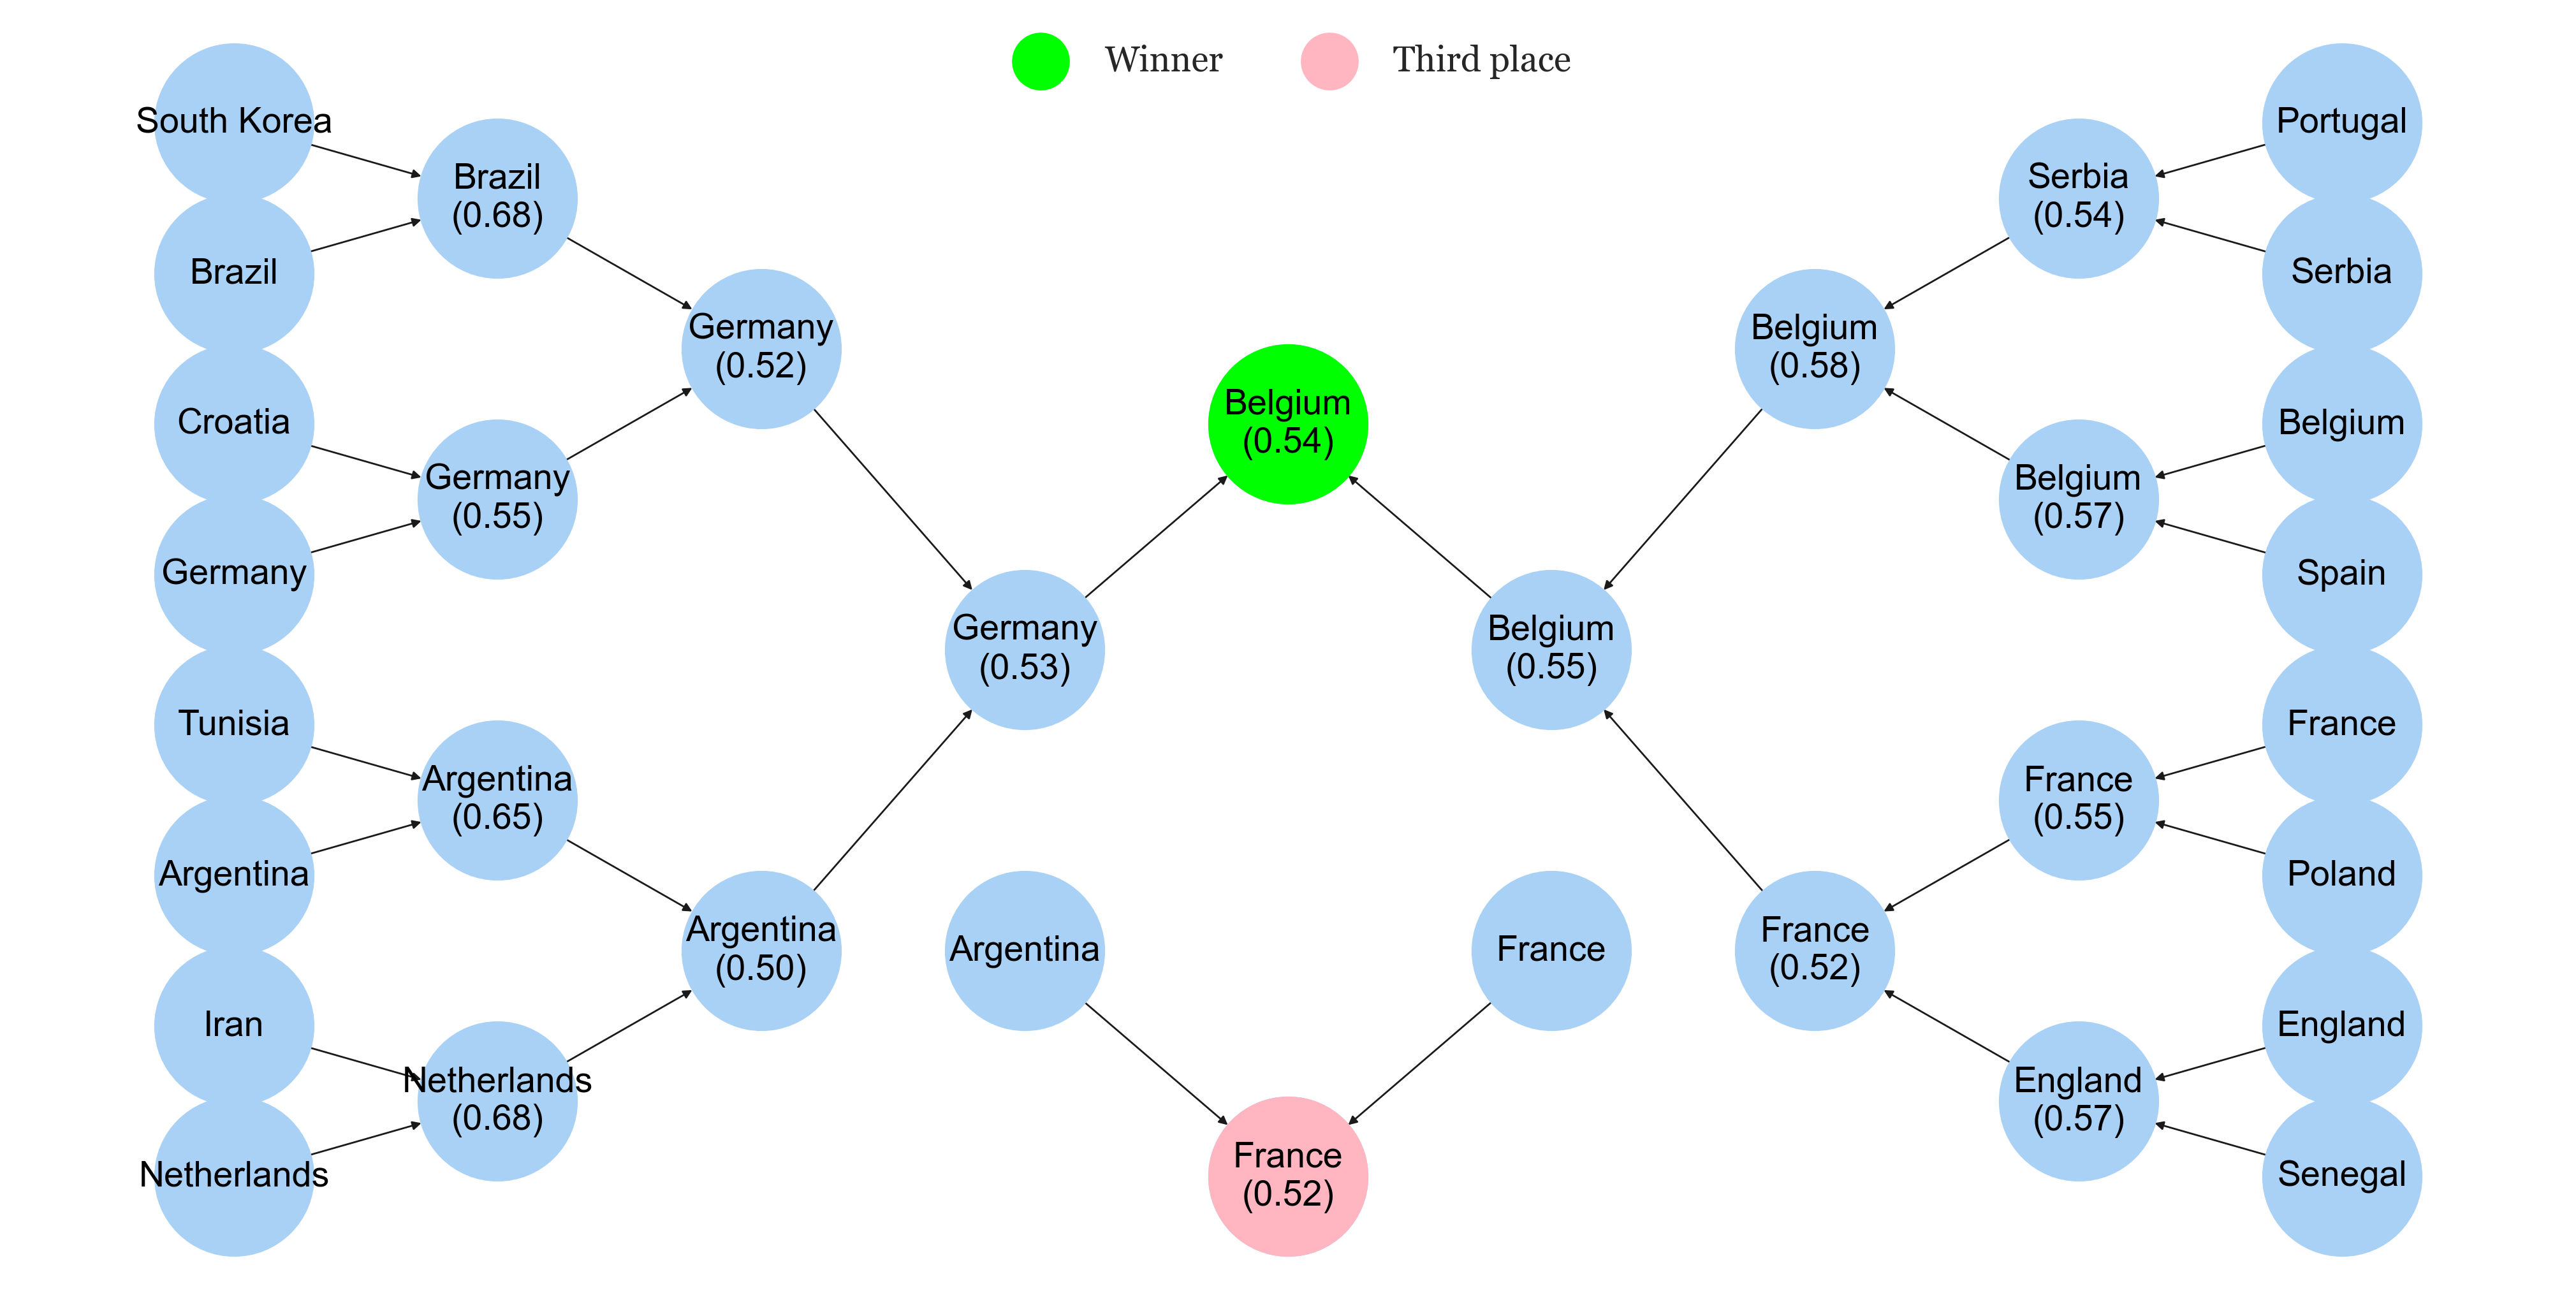

In [112]:
# Visualize the results as a node graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# add the nodes a1, b2, c1, d2, e1, f2, g1, h2 to the most left layer of the graph
# add the nodes a2, b1, c2, d1, e2, f1, g2, h1 to the most right layer of the graph
# add the nodes a1b2, c1d2, e1f2, g1h2 to the second left layer of the graph
# add the nodes a2b1, c2d1, e2f1, g2h1 to the second right layer of the graph
# add the nodes a1b2c1d2, e1f2g1h2 to the third left layer of the graph
# add the nodes a2b1c2d1, e2f1g2h1 to the third right layer of the graph
# add the nodes a1b2c1d2e1f2g1h2 to the fourth left layer of the graph
# add the nodes a2b1c2d1e2f1g2h1 to the fourth right layer of the graph
teams = {}
layer_0_team_names = ['a1', 'b2', 'c1', 'd2', 'e1', 'f2', 'g1', 'h2']
layer_8_team_names = ['a2', 'b1', 'c2', 'd1', 'e2', 'f1', 'g2', 'h1']
layer_0_team_names = [groups_winners[team_name] for team_name in layer_0_team_names]
layer_8_team_names = [groups_winners[team_name] for team_name in layer_8_team_names]
layer_1_team_names = [f"{round_of_16_winners[team_name]}\n({round_of_16_dict[team_name]['probability']:.2f})" for team_name in ['a1b2', 'c1d2', 'e1f2', 'g1h2']]
layer_7_team_names = [f"{round_of_16_winners[team_name]}\n({round_of_16_dict[team_name]['probability']:.2f})" for team_name in ['a2b1', 'c2d1', 'e2f1', 'g2h1']]
layer_2_team_names = [f"{quarter_finals_winners[team_name]}\n({quarter_finals_dict[team_name]['probability']:.2f})" for team_name in ['a1b2c1d2', 'e1f2g1h2']]
layer_6_team_names = [f"{quarter_finals_winners[team_name]}\n({quarter_finals_dict[team_name]['probability']:.2f})" for team_name in ['a2b1c2d1', 'e2f1g2h1']]
[G.add_node(team, layer=0, order=i) for team, i in zip(['a1', 'b2', 'c1', 'd2', 'e1', 'f2', 'g1', 'h2'], range(8))]
[G.add_node(team, layer=8, order=i) for team, i in zip(['a2', 'b1', 'c2', 'd1', 'e2', 'f1', 'g2', 'h1'], range(8))]
[G.add_node(team, layer=1, order=.5+2*i) for team, i in zip(['a1b2', 'c1d2', 'e1f2', 'g1h2'], range(4))]
[G.add_node(team, layer=7, order=.5+2*i) for team, i in zip(['a2b1', 'c2d1', 'e2f1', 'g2h1'], range(4))]
[G.add_node(team, layer=2, order=1.5+4*i) for team, i in zip(['a1b2c1d2', 'e1f2g1h2'], range(2))]
[G.add_node(team, layer=6, order=1.5+4*i) for team, i in zip(['a2b1c2d1', 'e2f1g2h1'], range(2))]
G.add_node('a1b2c1d2e1f2g1h2', layer=3, order=3.5)
G.add_node('a2b1c2d1e2f1g2h1', layer=5, order=3.5)
G.add_node('a1b2c1d2e1f2g1h2a2b1c2d1e2f1g2h1', layer=4, order=5)
# add three nodes for the third place teams
G.add_node(third_place_players['left_team'], layer=3, order=1.5)
G.add_node(third_place_players['right_team'], layer=5, order=1.5)
G.add_node("3rd place:" + third_place_team, layer=4, order=0)

# add to teams dict
teams.update({string: team for string, team in zip(['a1', 'b2', 'c1', 'd2', 'e1', 'f2', 'g1', 'h2'], layer_0_team_names)})
teams.update({string: team for string, team in zip(['a2', 'b1', 'c2', 'd1', 'e2', 'f1', 'g2', 'h1'], layer_8_team_names)})
teams.update({string: team for string, team in zip(['a1b2', 'c1d2', 'e1f2', 'g1h2'], layer_1_team_names)})
teams.update({string: team for string, team in zip(['a2b1', 'c2d1', 'e2f1', 'g2h1'], layer_7_team_names)})
teams.update({string: team for string, team in zip(['a1b2c1d2', 'e1f2g1h2'], layer_2_team_names)})
teams.update({string: team for string, team in zip(['a2b1c2d1', 'e2f1g2h1'], layer_6_team_names)})
teams.update({'a1b2c1d2e1f2g1h2': f"{semi_finals_winners['a1b2c1d2e1f2g1h2']}\n({semi_finals_dict['a1b2c1d2e1f2g1h2']['probability']:.2f})"})
teams.update({'a2b1c2d1e2f1g2h1': f"{semi_finals_winners['a2b1c2d1e2f1g2h1']}\n({semi_finals_dict['a2b1c2d1e2f1g2h1']['probability']:.2f})"})
teams.update({'a1b2c1d2e1f2g1h2a2b1c2d1e2f1g2h1' : f"{winner_of_world_cup}\n({finals_dict['a1b2c1d2e1f2g1h2a2b1c2d1e2f1g2h1']['probability']:.2f})"})
teams.update({'3rd place:' + third_place_team: f"{third_place_team}\n({third_place_dict['left_teamright_team']['probability']:.2f})"})
teams.update({third_place_team: third_place_team})
teams.update({fourth_place_team: fourth_place_team})

# add the edges
team1_team2_winner_list_of_tuples = \
    list(zip(['a1', 'c1', 'e1', 'g1'], ['b2', 'd2', 'f2', 'h2'], ['a1b2', 'c1d2', 'e1f2', 'g1h2'])) + \
    list(zip(['a2', 'c2', 'e2', 'g2'], ['b1', 'd1', 'f1', 'h1'], ['a2b1', 'c2d1', 'e2f1', 'g2h1'])) + \
    list(zip(['a1b2', 'e1f2'], ['c1d2', 'g1h2'], ['a1b2c1d2', 'e1f2g1h2'])) + \
    list(zip(['a2b1', 'e2f1'], ['c2d1', 'g2h1'], ['a2b1c2d1', 'e2f1g2h1'])) + \
    list(zip(['a1b2c1d2'], ['e1f2g1h2'], ['a1b2c1d2e1f2g1h2'])) + \
    list(zip(['a2b1c2d1'], ['e2f1g2h1'], ['a2b1c2d1e2f1g2h1'])) + \
    [('a1b2c1d2e1f2g1h2', 'a2b1c2d1e2f1g2h1', 'a1b2c1d2e1f2g1h2a2b1c2d1e2f1g2h1')] + \
    [(third_place_team, fourth_place_team, "3rd place:" + third_place_team)]

for team1, team2, winner in team1_team2_winner_list_of_tuples:
    G.add_edge(team1, winner)
    G.add_edge(team2, winner)

# draw the layers
pos = {}
for node in G.nodes():
    pos[node] = (G.nodes[node]['layer'], G.nodes[node]['order'])
# draw the graph with high dpi  
plt.figure(figsize=(20, 10), dpi=200)
# baby blue nodes
nx.draw(G, pos=pos, labels=teams, node_size=8000, font_size=20, font_color='black', node_color='#A9D0F5', with_labels=True)
# draw the winner in green and write winner above it
nx.draw_networkx_nodes(G, pos=pos, nodelist=['a1b2c1d2e1f2g1h2a2b1c2d1e2f1g2h1'], node_size=8000, node_color='#00FF00')
# draw the third place team in light red
nx.draw_networkx_nodes(G, pos=pos, nodelist=['3rd place:' + third_place_team], node_size=8000, node_color='#FFB6C1')
# add legends for green and light red
plt.scatter([], [], c='#00FF00', s=1000, label='Winner')
plt.scatter([], [], c='#FFB6C1', s=1000, label='Third place')
plt.legend(loc='upper center', ncol=2, fontsize=20, frameon=False)

# save the image
plt.savefig('world_cup_2022_winner.png', dpi=200)
plt.show()


# Feature Importance

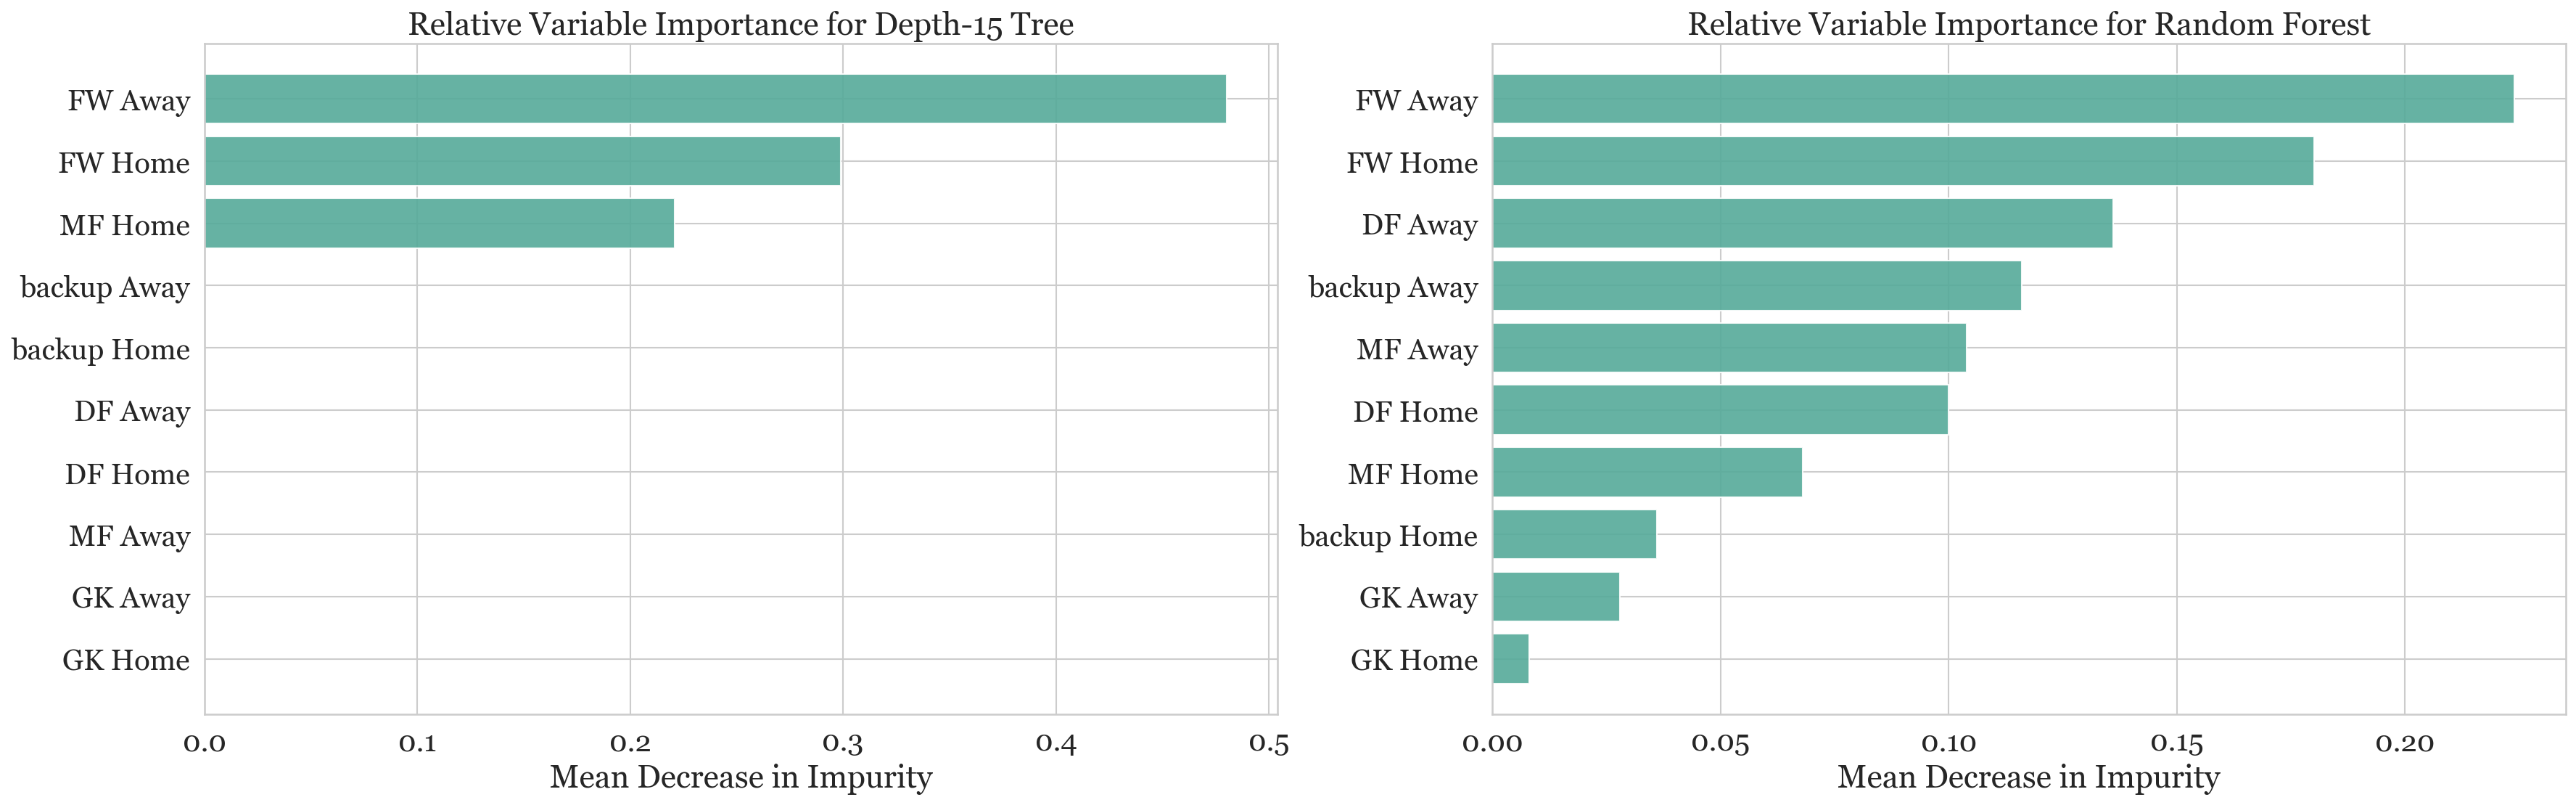

In [113]:
sns.set_theme(style='whitegrid', font='georgia', palette="dark:#5A9_r", font_scale = 1.75)
fig, axs = plt.subplots(1,2, figsize=(28,8))
models = {'Depth-15 Tree': dtree, 'Random Forest': rf} 
num_features = 10 
for i, (name, model) in enumerate(models.items()):
    importances = model.feature_importances_
    order = np.argsort(importances)[-num_features:]
    axs[i].barh(range(num_features), importances[order], tick_label=X_train.columns[order], alpha=0.9);
    axs[i].set_title(f"Relative Variable Importance for {name}")
    axs[i].set_xlabel("Mean Decrease in Impurity")
fig.savefig('test.png')

In [114]:
perm = PermutationImportance(rf, random_state=109, n_iter=10).fit(X_test, y_test)
display(eli5.show_weights(perm, feature_names=X_train.columns.tolist()))

NameError: name 'PermutationImportance' is not defined

In [ ]:
perm = PermutationImportance(dtree, random_state=109, n_iter=10).fit(X_test, y_test)
display(eli5.show_weights(perm, feature_names=X_train.columns.tolist()))

Weight,Feature
0.1577 ± 0.0645,MF Home
0.1269 ± 0.0601,FW Away
0.0365 ± 0.0453,FW Home
0.0346 ± 0.0300,MF Away
0.0279 ± 0.0264,GK Away
0.0279 ± 0.0250,backup Home
0.0202 ± 0.0407,backup Away
0.0202 ± 0.0303,DF Home
0.0192 ± 0.0530,DF Away
0.0019 ± 0.0437,GK Home
